<a href="https://colab.research.google.com/github/panghanwu/tibame_project/blob/main/UTKFace_data_view.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import glob
import random

In [2]:
# path
glob.glob('drive/My Drive/Datasets/UTKFace/*')

['drive/My Drive/Datasets/UTKFace/label.txt',
 'drive/My Drive/Datasets/UTKFace/img',
 'drive/My Drive/Datasets/UTKFace/UTKFace_data_view.ipynb']

# Dataset Size

In [8]:
img_dir = glob.glob('drive/My Drive/Datasets/UTKFace/img/*')
img_n = len(img_dir)

print('Total number of image')
print(img_n)

Total number of image
24106


# Label List

In [9]:
img_name = []
for n in img_dir:
  img_name.append(n[36:])

img_name[:6]

['66_0_1_20170117195116702.jpg',
 '65_1_1_20170117193956961.jpg',
 '65_1_1_20170117184041200.jpg',
 '67_0_1_20170117143355801.jpg',
 '67_0_3_20170117134845691.jpg',
 '68_0_1_20170117170414776.jpg']

In [10]:
img_cate = []
for n in img_name:
  img_cate.append(n.split(sep='_')[:3])

img_cate[:6]

[['66', '0', '1'],
 ['65', '1', '1'],
 ['65', '1', '1'],
 ['67', '0', '1'],
 ['67', '0', '3'],
 ['68', '0', '1']]

In [11]:
age    = []
gender = []
race   = []

for n in img_cate:
  age.append(n[0])
  gender.append(n[1])
  race.append(n[2])

gender_label = {
    '0': 'Male',
    '1': 'Female'
}

race_label = {
    '0': 'White',
    '1': 'Black',
    '2': 'Yellow',
    '3': 'Brown',
    '4': 'Others' 
}

print(age[6], gender[6], race[6])

67 0 1


# View Images

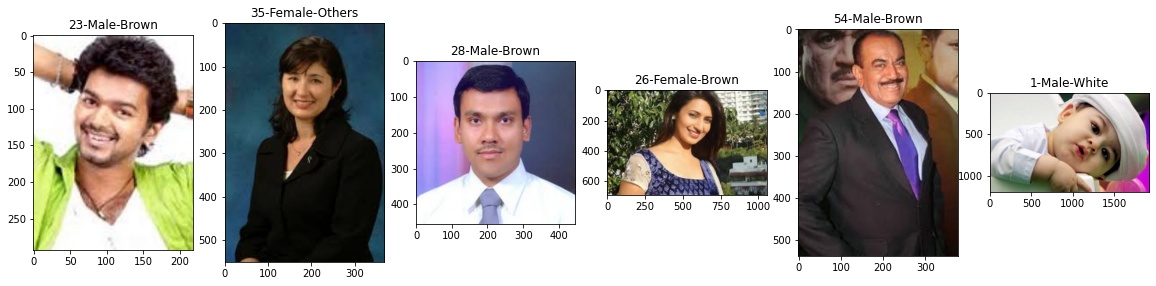

In [12]:

fig, ax = plt.subplots(1, 6, figsize=(20,6))

for i in range(6):
  rdx = random.randint(0,img_n-1)

  img = Image.open('drive/My Drive/Datasets/UTKFace/img/' + img_name[rdx])
  ax[i].imshow(img)

  title = str(age[rdx])+'-'+gender_label[gender[rdx]]+'-'+race_label[race[rdx]]
  ax[i].set_title(title)

plt.show()

# Save CSV

In [13]:
face_data_encoding = pd.DataFrame({
    'File Name':img_name,
    'Gender':gender,
    'Age':age,
    'Race':race
})

face_data_encoding

,File Name,Gender,Age,Race
0,66_0_1_20170117195116702.jpg,0,66,1
1,65_1_1_20170117193956961.jpg,1,65,1
2,65_1_1_20170117184041200.jpg,1,65,1
3,67_0_1_20170117143355801.jpg,0,67,1
4,67_0_3_20170117134845691.jpg,0,67,3
...,...,...,...,...
24101,56_0_0_20170111202409002.jpg,0,56,0
24102,60_0_0_20170111202420384.jpg,0,60,0
24103,62_0_0_20170111203056771.jpg,0,62,0
24104,58_0_0_20170111203101211.jpg,0,58,0


# Statistics

In [15]:
geder_in_label = list(map(lambda x: 'Male' if x=='0' else 'Female', gender))
race_in_label = list(map(lambda x: race_label[x], race))

face_data = pd.DataFrame({
    'Gender':geder_in_label,
    'Age':age,
    'Race':race_in_label
})

face_data

,Gender,Age,Race
0,Male,66,Black
1,Female,65,Black
2,Female,65,Black
3,Male,67,Black
4,Male,67,Brown
...,...,...,...
24101,Male,56,White
24102,Male,60,White
24103,Male,62,White
24104,Male,58,White


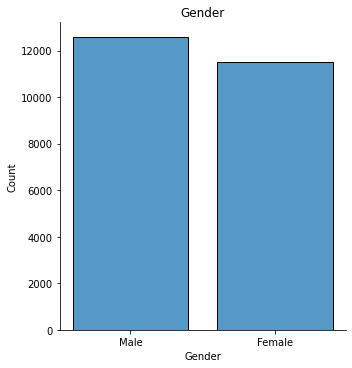

In [25]:
sns.displot(face_data['Gender'], shrink=.8)
plt.title('Gender')
plt.show()

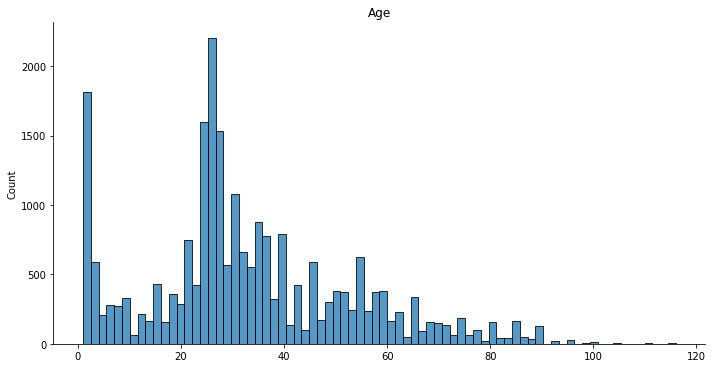

In [49]:
age_int = list(map(int, face_data['Age']))
sns.displot(age_int, aspect=2, kde=False)
plt.title('Age')
plt.show()

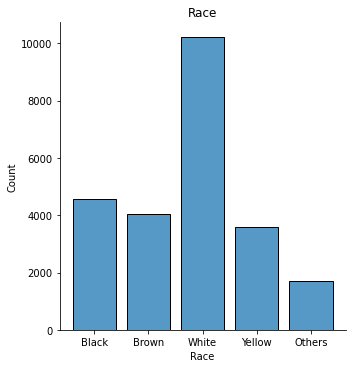

In [31]:
sns.displot(face_data['Race'], shrink=.8)
plt.title('Race')
plt.show()